<a href="https://colab.research.google.com/github/GousemujeebShaik/Case-Studies/blob/main/RecomenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import section Github
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Lets read all the Four DataSets:
1. Users: Where we have all the unique UserID's.
2. Songs: We have list of all the SongID's
3. Triplets: This data set will give the frequency of the Songs listned by user.
4. Unique Track: Will give us the details of the Song Artist and release

In [3]:
df_user = pd.read_csv('data/kaggle_users.txt', sep='\t', names=['userid'])
df_user.head()

,userid
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d
1,d7083f5e1d50c264277d624340edaaf3dc16095b
2,d68dc6fc25248234590d7668a11e3335534ae4b4
3,9be82340a8b5ef32357fe5af957ccd54736ece95
4,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8


In [4]:
df_songs = pd.read_csv('data/kaggle_songs.txt', sep=' ', names=['SongID','Sr.No'])
df_songs.drop('Sr.No', axis=1, inplace=True)
df_songs.head()

,SongID
0,SOAAADD12AB018A9DD
1,SOAAADE12A6D4F80CC
2,SOAAADF12A8C13DF62
3,SOAAADZ12A8C1334FB
4,SOAAAFI12A6D4F9C66


In [5]:
df_triplet = pd.read_csv('data/kaggle_visible_evaluation_triplets.txt', sep='\t', names=['Userid', 'Songid','Freq'])
df_triplet.head()

,Userid,Songid,Freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [6]:
df_uniquetrack = pd.read_csv('data/unique_tracks.txt', sep='<SEP>', names=['Trackid', 'Songid','ArtistName','Release'])
df_uniquetrack.head()

,Trackid,Songid,ArtistName,Release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


Now that all the Data is available, let's start with the EDA Analysis

Merge both the Triplets and Unique Track dataset on the Song ID columns.

In [24]:
df_merge=pd.merge(df_triplet,df_uniquetrack, how='left')
df_merge.tail()

,Userid,Songid,Freq,Trackid,ArtistName,Release
1491947,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,TRPLXFD128F1454961,Mos Def,Ms. Fat Booty
1491948,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,TRRBUQL12903CCE501,Sam Cooke,Ain't Misbehavin
1491949,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,TRHNKAU128F9300856,Southside Spinners,Luvstruck
1491950,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,TRDULYN128F4248762,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla
1491951,5e650759ebf89012044c6d52121eeada8b0ec814,SOTCMDJ12A6D4F8528,3,TRZJNDO128EF343498,Angels and Airwaves,The Gift


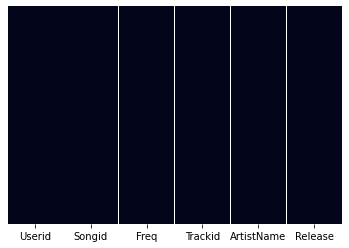

In [8]:
sns.heatmap(df_merge.isnull(),yticklabels=False,cbar=False)

In [25]:
df_merge.isnull().sum()

Userid        0
Songid        0
Freq          0
Trackid       0
ArtistName    0
Release       1
dtype: int64

In [9]:
df_merge['Freq'].fillna(0,inplace=True)

In [23]:
df_merge.tail()

,Userid,Songid,Freq,ArtistName,Release
1491947,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,Mos Def,Ms. Fat Booty
1491948,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,Sam Cooke,Ain't Misbehavin
1491949,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,Southside Spinners,Luvstruck
1491950,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla
1491951,5e650759ebf89012044c6d52121eeada8b0ec814,SOTCMDJ12A6D4F8528,3,Angels and Airwaves,The Gift


As the Song ID and the Track ID serve the same purpose we can drop any one

In [11]:
df_merge.drop('Trackid',axis=1, inplace=True)

In [12]:
   df_merge.head()

,Userid,Songid,Freq,ArtistName,Release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [13]:
df_merge.shape

(1491952, 5)

In [14]:
print("The Total Songs Listened are {}".format(df_merge.shape[0]))
print("The Total number of Users are {}".format(df_merge['Userid'].nunique()))
print("The Total number of Songs are {}".format(df_merge['Songid'].nunique()))
print("The Total number of Artists are {}".format(df_merge['ArtistName'].nunique()))
print("The Total number of Release are {}".format(df_merge['Release'].nunique()))

The Total Songs Listened are 1491952
The Total number of Users are 110000
The Total number of Songs are 163206
The Total number of Artists are 28367
The Total number of Release are 137670


Feature User ID

In [15]:
df_merge['Userid'].value_counts()

316110734d8da7478cc33237458814f770a9eb7a    57
ad4b2717e89766b66b96fe52a38736116e315874    57
3233c598c50f0ddbd351504e773cd51de79691db    55
d30e18323f15426c3cdc8585252ed34459916f51    55
9b0f827c8bad0cf089b0d778307e1b390f463730    54
                                            ..
e64fc57fa91fc040a92e5fdafa9a5d0fd53b1ff9     5
8171a26ee9605d943f2eb350164d80c8de44e691     5
e9ad0f675aedcc61b55049f8b5090e35c3d47d40     5
708f06d1c99ca8d6cf511bb53b4bc035080d1d57     5
f06a4b7855b255020a27b4fae0fa3dfd8f15485f     5
Name: Userid, Length: 110000, dtype: int64

Below are the Top five Users, that listned the Songs Most

In [21]:
df_merge[['Userid','Freq']].groupby(['Userid'],sort=True).sum().sort_values(['Freq'], ascending=False).head(5)

,Freq
Userid,
938c2632d43eeadb8a83a7cc254d014f9cea6afe,1369
090b841eaf56d343a26625c2c6d08b823927bc4f,1305
1c5aa998482a40abfd020759e7d757eb6c510e72,1213
c6150292374fb1dad89982367b3245dd5004c718,1192
957440a77858369fb7a6bcc6fa408fc187d5bd7b,1187


Below are the Least Five Users that listned the Song less

In [22]:
df_merge[['Userid','Freq']].groupby(['Userid'],sort=True).sum().sort_values(['Freq'], ascending=True).head(5)

,Freq
Userid,
1858b9d771784f35b11587d4848604d5686e2e6a,5
105e070c30b924ad8c12dfc93879510fffce9e9f,5
473faa31a070d046588438a24838ee2ea59ba75a,5
4117443d6ef69fdf555b736782bed19a2bf73218,5
23a0d4a8ba71eef8abd4e4e4dd83060952c703f7,5


Below are the Top Five More Listned Songs

In [26]:
df_merge[['Userid','Songid']].groupby(['Songid'])['Songid'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

,Songid,count
38185,SOFRQTD12A81C233C0,5043
5478,SOAUWYT12A81C206F1,4483
10546,SOBONKR12A58A7A7E0,4136
140446,SOWCKVR12A8C142411,3822
6096,SOAXGDH12A8C13F8A1,3780


Below are the Top Five Least Listned Songs

In [27]:
df_merge[['Userid','Songid']].groupby(['Songid'])['Songid'].count().reset_index(name='count').sort_values(['count'], ascending=True).head(5)

,Songid,count
121078,SOSVEKO12AB01884A5,1
109853,SOQYUKJ12A8C137555,1
109851,SOQYTWN12A8C138B38,1
109850,SOQYTSU12AC468C5E9,1
49885,SOHLNPT12AB01860FE,1


Let's find which user listned the song many times

In [28]:
df_merge[['Userid','Songid','Freq']].sort_values(['Freq'],ascending=False)

,Userid,Songid,Freq
1490140,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923
862102,a1cc4d088600df2db42e6a305974675ffe8c905d,SOPMHHE12AB01845F6,646
484425,2d9ea6058d0872ccdc5b1c5c685758bb9c55f0a3,SOAOXTG12A67021AA7,597
1334371,69ad6b6a1d14d740eb8c2f013a19c1f8048cecde,SONGOJV12AF729AEBD,582
660940,a86e68128c6a48d3392db22ce1151a3bdccf5fcf,SOFVLYV12A8C145D8F,537
...,...,...,...
631230,287db61de9cc414bca70cc80c1a977118da45f4d,SOWYRRB12A8C13ADFA,1
631231,287db61de9cc414bca70cc80c1a977118da45f4d,SOAYATB12A6701FD50,1
631234,287db61de9cc414bca70cc80c1a977118da45f4d,SOVMWUC12A8C13750B,1
631235,287db61de9cc414bca70cc80c1a977118da45f4d,SOBTXPM12A8C13D393,1


Let's find how many songs are released in each Release

In [35]:
df_uniquetrack[['Songid','ArtistName','Release']].groupby(['Release','ArtistName']).count().sort_values('Songid',ascending=False)

,,Songid
Release,ArtistName,
Untitled,Der Blutharsch,87
Hip-Hop Beats,Hip-Hop Beats,33
Untitled,7000 Dying Rats,31
Greece 2000,Three Drives,28
Bonus Track,Elakelaiset,25
...,...,...
Hey Jim,James Moody,1
Hey Jimmy,Los Natas,1
Hey Jimmy Freek,The Neptunas,1


In [37]:
df_uniquetrack[df_uniquetrack['Release']=='Untitled']

,Trackid,Songid,ArtistName,Release
4145,TRMGVDK12903CB6FA7,SODNRCH12AB0185AD9,Der Blutharsch,Untitled
8449,TRMRJUC128F4275423,SOJXDWU12A8C13F636,Harry Pussy,Untitled
8730,TRMROOY128F9353E6B,SOUUXQO12AB0189A02,Mikaela's Fiend,Untitled
8976,TRMBMYF128F92C6D14,SOUPWRP12A58A77BE1,Jonezetta,Untitled
12025,TRMQHJD128F424A4FF,SOJJUDG12A8C1324EA,Robert Hood,Untitled
...,...,...,...,...
977117,TRYIZNU12903D04194,SONZPZO12AC468537A,Der Blutharsch,Untitled
983070,TRYTIVP128F42A4E3E,SOSYDPG12A8C13FD25,Agression,Untitled
993373,TRYDNMA12903CB6FD0,SOMCQFO12AB0186E41,Der Blutharsch,Untitled
995675,TRYXWAH128F934C318,SOZVEEA12AB018374C,Psyopus,Untitled


In [41]:
df_uniquetrack[df_uniquetrack['Release'] != 'Untitled'][['Songid','ArtistName','Release']].groupby(['Release','ArtistName']).count().sort_values('Songid',ascending=False)

,,Songid
Release,ArtistName,
Hip-Hop Beats,Hip-Hop Beats,33
Greece 2000,Three Drives,28
Bonus Track,Elakelaiset,25
Jana Gana Mana,AR Rahman,20
The Age Of Love,Age Of Love,20
...,...,...
Hey Hey (Rock On),The Hot Rocks,1
Hey Hey (Vampires Vs. Cheerleaders Mix),Superchick,1
Hey Hey Baby,Helen Humes,1


From above it is clear that in Hip Hop Beats release 33 Songs has released